In [123]:
import pandas as pd
import numpy as np

df = pd.read_csv("housing_price_dataset.csv")

In [124]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [125]:
df.shape

(50000, 6)

In [126]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [127]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [128]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [130]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [131]:
set(df['Neighborhood'])

{'Rural', 'Suburb', 'Urban'}

In [132]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df['Neighborhood'] = label.fit_transform(df['Neighborhood'])

In [133]:
set(df['Neighborhood'])

{0, 1, 2}

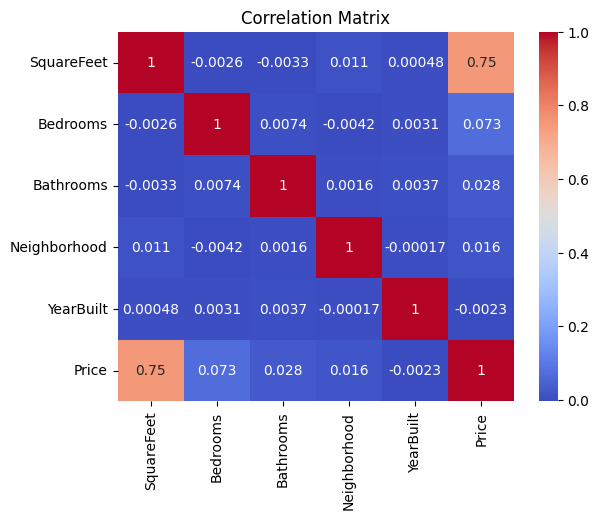

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [135]:
x = df.drop(columns=['Price','YearBuilt'],axis=1)
y = df['Price']

In [136]:
x.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood
0,2126,4,1,0
1,2459,3,2,0
2,1860,2,1,1
3,2294,2,1,2
4,2130,5,2,1


In [137]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

x = scale.fit_transform(x)

In [138]:
print(f'Data Type after transfromation : {type(x)}')

Data Type after transfromation : <class 'numpy.ndarray'>


In [139]:
x = pd.DataFrame(x)

x.head()

,0,1,2,3
0,0.563282,0.666667,0.0,0.0
1,0.729865,0.333333,0.5,0.0
2,0.430215,0.000000,0.0,0.5
3,0.647324,0.000000,0.0,1.0
4,0.565283,1.000000,0.5,0.5


Splitting dataset into Training and Testing data

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [141]:
print(f'Size of the data : {x.shape}')
print(f'Size of the training data : {x_train.shape}')
print(f'Size of the testing data : {x_test.shape}')

Size of the data : (50000, 4)
Size of the training data : (37500, 4)
Size of the testing data : (12500, 4)


In [142]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [143]:
model.fit(x_train, y_train)

LinearRegression()

In [144]:
y_pred = model.predict(x_test)

In [145]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Linear Regression RMSE:", rmse)
print("Linear Regression MSE:", mse)
print("Linear Regression R-squared:", r2)

Linear Regression RMSE: 49582.986048579565
Linear Regression MSE: 2458472505.493636
Linear Regression R-squared: 0.5737612335222099


In [146]:
# features : SquareFeet, Bedrooms, Bathrooms, Neighborhood

new_data = [[1400, 3, 3, 1]]
predicted_price = model.predict(scale.transform(new_data))

print("Predicted Price:", predicted_price[0])

Predicted Price: 164836.87236394256


c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [147]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(objective ='reg:squarederror', 
                           colsample_bytree = 0.3, 
                           learning_rate = 0.1,
                           max_depth = 5, 
                           alpha = 10, 
                           n_estimators = 100)

xg_reg.fit(x_train, y_train)

y_pred = xg_reg.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("XGB Regressor RMSE:", rmse)
print("XGB Regressor MSE:", mse)
print("XGB Regressor R-squared:", r2)

XGB Regressor RMSE: 49931.81963960456
XGB Regressor MSE: 2493186612.5219994
XGB Regressor R-squared: 0.5677426597427253


In [148]:
# features : SquareFeet, Bedrooms, Bathrooms, Neighborhood

new_data = [[1400, 3, 3, 1]]
predicted_price = xg_reg.predict(scale.transform(new_data))

print("Predicted Price:", predicted_price[0])

Predicted Price: 168166.1


c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [149]:
import keras
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

Layer addition formula : model.add(type of layer(number of neurons, activation = __ , input_dim = __ )) wherein input_dim argument is for input layer only.

In [153]:
model = keras.models.Sequential()

model.add(Dense(32, activation='relu',input_dim = 4))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation = 'linear'))
model.compile(loss = 'mean_squared_error',optimizer = 'nadam')

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',verbose=1, save_best_only=True, mode='min')

model.summary()

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,961 (81.88 KB)

 Trainable params: 20,961 (81.88 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
history = model.fit(x_train,y_train,epochs=500,batch_size=100,validation_split=0.2,callbacks = [model_checkpoint])

Epoch 1/500


283/340 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 45064040448.0000
Epoch 1: val_loss improved from inf to 4383511552.00000, saving model to best_model.keras
340/340 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 41641779200.0000 - val_loss: 4383511552.0000
Epoch 2/500
284/340 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 3881273856.0000
Epoch 2: val_loss improved from 4383511552.00000 to 2575085312.00000, saving model to best_model.keras
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3790848256.0000 - val_loss: 2575085312.0000
Epoch 3/500
289/340 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 2525082624.0000
Epoch 3: val_loss improved from 2575085312.00000 to 2504336384.00000, saving model to best_model.keras
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2525064960.0000 - val_loss: 2504336384.0000
Epoch 4/500
286/340 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 2468237056.0000
Epoch 4: val_loss did not improve from 2504336384.00000
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2474607872.000

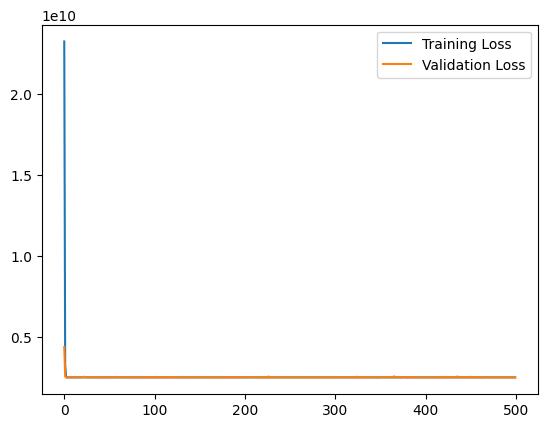

In [155]:
plt.plot(history.history['loss'], label='Training Loss') # plotting training and validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [156]:
from keras.models import load_model

model = load_model("best_model.keras")

y_pred = model.predict(x_test)

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step


In [157]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("ANN RMSE:", rmse)
print("ANN MSE:", mse)
print("ANN R-squared:", r2)

ANN RMSE: 49327.73359631698
ANN MSE: 2433225301.749219
ANN R-squared: 0.5799847052660851


Price prediction

In [158]:
# features : SquareFeet, Bedrooms, Bathrooms, Neighborhood

new_data = [[1400, 3, 3, 1]]
predicted_price = model.predict(scale.transform(new_data))

print("Predicted Price:", predicted_price[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Price: [165393.64]


c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
